# Web Scraping

Tomado de [acá](https://ciberseguridad.com/guias/recursos/web-scraping/)


## ¿Qué es Web Scraping?

El web scraping se refiere a la extracción de datos de un sitio web. Esta información se recopila y luego se exporta a un formato que sea más útil para el usuario. Ya sea una hoja de cálculo o una API.  Aunque el web scraping se puede hacer manualmente, en la mayoría de los casos, se prefieren las herramientas automatizadas cuando se extraen datos web, ya que pueden ser menos costosas y funcionan a un ritmo más rápido. Pero en la mayoría de los casos, el web scraping no es una tarea sencilla. Los sitios web vienen en muchas formas y, como resultado, los raspadores web varían en funcionalidad y características.

## Partes del Web Scraping
Tomado de [acá](https://www.iebschool.com/blog/que-es-el-web-scrapping-y-como-se-utiliza-en-los-negocios-digital-business/)

1. **El rastreador**: Un rastreador web, al que generalmente llamamos “araña”, es una inteligencia artificial que navega por Internet para indexar y buscar contenido siguiendo enlaces y explorando, como una persona con demasiado tiempo libre. En muchos proyectos, primero «rastrea» la web o un sitio web específico para descubrir URL que luego pasa a su raspador.

2. **El raspador**: Un web scraper es una herramienta especializada diseñada para extraer datos de una página web de forma precisa y rápida. Los web scrapers varían ampliamente en diseño y complejidad, según el proyecto. Una parte importante de cada raspador son los localizadores de datos (o selectores) que se utilizan para encontrar los datos que desea extraer del archivo HTML

## Usos

Tomado de [acá](https://www.iebschool.com/blog/que-es-el-web-scrapping-y-como-se-utiliza-en-los-negocios-digital-business/)


1. **Inteligencia de precios**
2. **Investigación de mercado**
3. **Datos alternativos para las finanzas**
4. **Propiedad inmobiliaria**
5. **Monitoreo de noticias y contenido**
6. **Monitoreo de marca**
7. **Automatización del negocio**
8. **Monitoreo de MAP**

# Un ejemplo de Web Scraping (a mano)

## Primer Paso
1. El objetivo es obtener una base de datos de todos los carros publicados en la pagina [tucarro](https://carros.tucarro.com.co).
2. Primero identificamos la pagina web.

3. Primer ejercicio: ¿Qué datos ven en la página web?

## Segundo paso

1. ¿Qué contiene un hipervínculo de la página?
2. De click en un vehiculo, y en la nueva página haga una lista de los datos útiles del vehiculo.

## Tercer Paso

1. Leemos el [HTML](https://es.wikipedia.org/wiki/HTML) de la página.

2. Identifique dentro del HTML del vehiculo las siguientes ubicaciones:


*   Precio
*   Tabla de valores
*   Descripción del vehículo


3. Ahora, hay que empezar a raspar la web


## Cuarto paso

Necesitamos muchisimas [APIs](https://www.xataka.com/basics/api-que-sirve) para empezar a manejar la página en Python.

### Requests
1. [**requests**](https://realpython.com/python-requests/): La biblioteca de solicitudes es el estándar de facto para realizar solicitudes HTTP en Python. Abstrae las complejidades de realizar solicitudes detrás de una API hermosa y simple para que pueda concentrarse en interactuar con los servicios y consumir datos en su aplicación.


In [35]:
import requests
import numpy as np
import pandas as pd
import re
import csv
import json
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [36]:
url ="https://www.tucarro.com.co/"
respuesta= requests.get(url)
respuesta

<Response [200]>

'\n<!DOCTYPE html>\n<html lang="es-CO">\n<head><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://www.google.com"/><link rel="preconnect" href="https://data.mercadolibre.com"/><link rel="preconnect" href="https://http2.mlstatic.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://analytics.tucarro.com.co"/><link rel="preconnect" href="https://analytics.tucarro.com"/><link rel="preconnect" href="https://analytics.mercadolibre.com"/><link rel="preconnect" href="https://www.google.com.co"/><script type=\'text/javascript\'>window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRJS-689ffbd95eae88e39ac","applicationID":"226554818","applicationTime":513.137453,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bDVQEWQFdWld2VF5XGBhQEFVKDlhRVlFaXFN5WQhSSRtQVVlZQB0OW1kLUwxaU35ZWFYeG1heAEURVUcfAllSXFBeVgJ5BFlRDxQaXFRRRUw
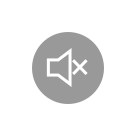
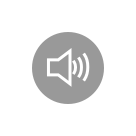
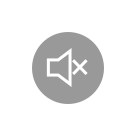
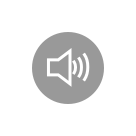

In [37]:
## Que es esto
respuesta.text

### Beautiful Soup
 [**Beautiful Soup**](https://www.crummy.com/software/BeautifulSoup/bs4/doc/): Beautiful Soup es una biblioteca de Python para extraer datos de archivos HTML y XML. Funciona con su analizador favorito para proporcionar formas idiomáticas de navegar, buscar y modificar el árbol de análisis. Comúnmente ahorra a los programadores horas o días de trabajo.

In [38]:
from bs4 import BeautifulSoup

In [39]:
url ="https://www.tucarro.com.co/"
respuesta= requests.get(url)
tucarro_soup = BeautifulSoup(respuesta.text, "html.parser")


<!DOCTYPE html>

<html lang="es-CO">
<head><link href="https://www.google-analytics.com" rel="preconnect"/><link href="https://www.google.com" rel="preconnect"/><link href="https://data.mercadolibre.com" rel="preconnect"/><link href="https://http2.mlstatic.com" rel="preconnect"/><link href="https://stats.g.doubleclick.net" rel="preconnect"/><link href="https://analytics.tucarro.com.co" rel="preconnect"/><link href="https://analytics.tucarro.com" rel="preconnect"/><link href="https://analytics.mercadolibre.com" rel="preconnect"/><link href="https://www.google.com.co" rel="preconnect"/><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRJS-689ffbd95eae88e39ac","applicationID":"226554818","applicationTime":689.878296,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bDVQEWQFdWld2VF5XGBhQEFVKDlhRVlFaXFN5WQhSSRtQVVlZQB0OW1kLUwxaU35ZWFYeG1heAEURVUcfAllSXFBeVgJ5BFlRDxQaXFRRRUwEREpN
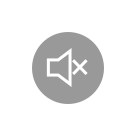
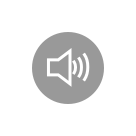
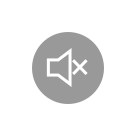
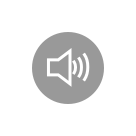

In [40]:
tucarro_soup

**ALERTA!!** ¿Es legal esta vaina?

Consultar la legalidad del WebScraping

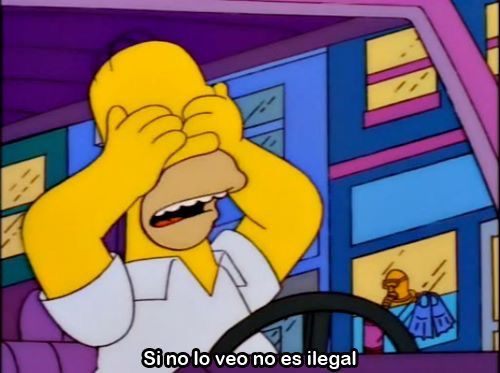

#### ¿Cuál es la utilidad de Beautiful soup?

In [41]:
### Encuentra el primer div de HTML
tucarro_soup.find("div")

<div class="nav-bounds"><a class="nav-logo" href="//www.tucarro.com.co" tabindex="2">TuCarro Colombia</a><form action="https://www.tucarro.com.co/jm/search" class="nav-search" method="GET" role="search"><input autocapitalize="off" autocomplete="off" autocorrect="off" class="nav-search-input" maxlength="120" name="as_word" spellcheck="false" tabindex="3" type="text"/><button class="nav-search-btn" tabindex="4" type="submit"><div class="nav-icon-search" role="img"></div></button></form><div class="nav-header-menu-wrapper"><label aria-controls="nav-header-menu" for="nav-header-menu-switch"><span class="hamburger-top-bread"></span><span class="hamburger-patty"></span><span class="hamburger-bottom-bread"></span></label><nav class="nav-header-menu-mobile-guest" id="nav-header-menu-mobile"><div id="nav-header-menu-mobile-content"><div class="nav-header-menu-mobile-guest" id="nav-header-menu-mobile-user-info"><div class="nav-header-menu-mobile-guest-logo"><svg class="nav-header-menu-mobile-gue

In [42]:
### Encuentra el todos los div de HTML
## Y los guarda en una lista
div_todos =tucarro_soup.find_all("div")

In [44]:
len(div_todos)

307

In [46]:
div_todos[1]

<div class="nav-icon-search" role="img"></div>

#### Ahora ya sabemos buscar dentro del HTML

Busquemos una imagen 

In [49]:
imagenes = tucarro_soup.find_all("img")
imagenes[0]

<img alt="AUTOS VERIFICADOS " class="main-slider-img" decoding="async" src="https://http2.mlstatic.com/storage/splinter-admin/o:f_jpg,q_auto:best/1664579317455-main-slider-desktop-1600x340v32.jpg" srcset="https://http2.mlstatic.com/storage/splinter-admin/o:f_jpg,q_auto:best/1664579317455-main-slider-desktop-1600x340v32.jpg 1x,
      https://http2.mlstatic.com/storage/splinter-admin/o:f_jpg,q_auto:best/1664579317455-main-slider-desktop-1600x340v32.jpg 2x,"/>

In [50]:
imagenes[0]["src"]

'https://http2.mlstatic.com/storage/splinter-admin/o:f_jpg,q_auto:best/1664579317455-main-slider-desktop-1600x340v32.jpg'

In [69]:
len(imagenes)

41

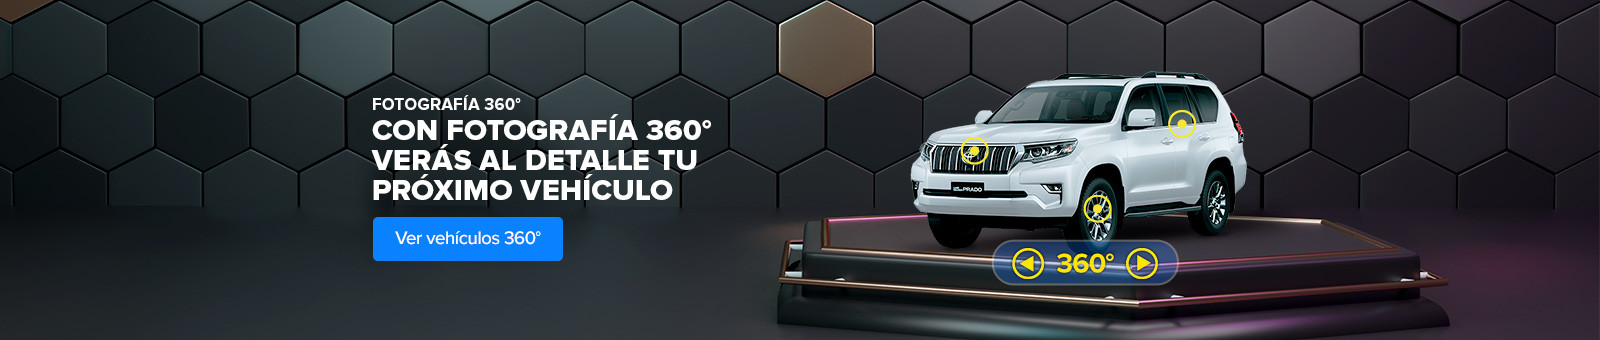

In [75]:
import IPython
imagen = imagenes[1]["src"]
IPython.display.Image(imagen, width = 3000)

### Busquemos el enlace al carro


In [76]:
# La ruta de tu carro 
pagina_web = 'https://carros.tucarro.com.co/'

# Solicitar toda la info
tucarro_respuesta = requests.get(pagina_web)

# Analiza el HTML usando BeautifulSoup
tucarro_soup= BeautifulSoup(tucarro_respuesta.text, 'html.parser')

# Title of the parsed page
tucarro_soup.title

<title>Carros y Camionetas | TuCarro</title>

#### Ojalá no haya cambiado
Pero dentro de la div, cuya clase es *ui-search-result__image shops__picturesStyles* hay un enlace a la página del carro.

In [78]:
Carros_html = tucarro_soup.find_all("div", {"class":"ui-search-result__image shops__picturesStyles"})
Carros_html

[<div class="ui-search-result__image shops__picturesStyles"><a class="ui-search-link" href="https://articulo.tucarro.com.co/MCO-979612507-toyota-hilux-ht-_JM#position=1&amp;search_layout=grid&amp;type=item&amp;tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087" target="_blank" title="Toyota Hilux Ht"><div class="carousel-container arrow-visible"><div class="slick-initialized slick-slider"><div class="slick-list" role="presentation"><div class="slick-track"><div class="slick-slide slick-active" data-index="0" tabindex="-1"><img alt="Toyota Hilux Ht" class="ui-search-result-image__element shops__image-element lazy-loadable" data-src="https://http2.mlstatic.com/D_NQ_NP_750841-MCO51817225385_102022-W.jpg" height="213" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" width="284"/></div></div></div></div></div></a></div>,
 <div class="ui-search-result__image shops__picturesStyles"><a class="ui-search-link" href="https://articulo.tucarro.com.co/MCO-979493939-

### Con los enlaces

Dentro de cada objeto de la lista, existe subdivisiones

In [80]:
Carros_html[0].find("a", {"class":"ui-search-link"})["href"]


'https://articulo.tucarro.com.co/MCO-979612507-toyota-hilux-ht-_JM#position=1&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087'

### Todos los enlaces
1.  Creo una lista con todas Urls

In [83]:
urls = []
for ii in range(len(Carros_html)):
  a = Carros_html[ii].find("a", {"class":"ui-search-link"})
  print("La URL es", a["href"])
  urls.append(a["href"])

La URL es https://articulo.tucarro.com.co/MCO-979612507-toyota-hilux-ht-_JM#position=1&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087
La URL es https://articulo.tucarro.com.co/MCO-979493939-mazda-3-20-grand-touring-lx-_JM#position=2&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087
La URL es https://articulo.tucarro.com.co/MCO-979493747-audi-a6-18-tfsi-ambition-_JM#position=3&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087
La URL es https://articulo.tucarro.com.co/MCO-979594242-renault-megane-2-_JM#position=4&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087
La URL es https://articulo.tucarro.com.co/MCO-979606282-chevrolet-sail-_JM#position=5&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087
La URL es https://articulo.tucarro.com.co/MCO-979579731-renault-duster-20-dynamique-4x4-_JM#position=6&search_layout=grid&type=item&tracking_id=947e90e5-8

### Una sola URL

1. Vamos a manejar una sola Url


In [84]:
pagina = urls[0]
# Solicitar toda la info
respuesta = requests.get(pagina)
resp_soup= BeautifulSoup(respuesta.text, 'html.parser')


In [85]:
pagina

'https://articulo.tucarro.com.co/MCO-979612507-toyota-hilux-ht-_JM#position=1&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087'

### Extraer el precio del vehículo

In [87]:
precio = resp_soup.find_all("span", {"class":"andes-visually-hidden"})
precio

[<span class="andes-visually-hidden">85000000 pesos</span>]

In [91]:
precio[0].text.strip()

'85000000 pesos'

### Extraemos las tablas

In [90]:
tablas = resp_soup.find_all("table")
tablas

[<table class="andes-table"><tbody class="andes-table__body"><tr class="andes-table__row" rowspan=""><th class="andes-table__header andes-table__header--left ui-pdp-specs__table__column ui-pdp-specs__table__column-title">Marca</th><td class="andes-table__column andes-table__column--left ui-pdp-specs__table__column"><span class="andes-table__column--value">Toyota</span></td></tr><tr class="andes-table__row" rowspan=""><th class="andes-table__header andes-table__header--left ui-pdp-specs__table__column ui-pdp-specs__table__column-title">Modelo</th><td class="andes-table__column andes-table__column--left ui-pdp-specs__table__column"><span class="andes-table__column--value">Hilux</span></td></tr><tr class="andes-table__row" rowspan=""><th class="andes-table__header andes-table__header--left ui-pdp-specs__table__column ui-pdp-specs__table__column-title">Año</th><td class="andes-table__column andes-table__column--left ui-pdp-specs__table__column"><span class="andes-table__column--value">2008

### Pandas para leer tablas

Toda la infromación del uso está [acá](https://pbpython.com/pandas-html-table.html)


In [102]:
pagina = urls[0]
# Solicitar toda la info
respuesta = requests.get(pagina)
tabla=pd.read_html(respuesta.text)
tabla[0]

,0,1
0,Marca,Toyota
1,Modelo,Hilux
2,Año,2008
3,Color,Verde
4,Tipo de combustible,Gasolina
5,Puertas,4
6,Transmisión,Mecánica
7,Motor,2700
8,Tipo de carrocería,Pick-Up
9,Kilómetros,150500 km


Transponemos la tabla para poder apilarla con otras web

In [103]:
tabla = tabla[0].T
tabla

,0,1,2,3,4,5,6,7,8,9
0,Marca,Modelo,Año,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros
1,Toyota,Hilux,2008,Verde,Gasolina,4,Mecánica,2700,Pick-Up,150500 km


La primera fila es el nombre de las columnas

In [104]:
tabla.columns = tabla.loc[0]
tabla

,Marca,Modelo,Año,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros
0,Marca,Modelo,Año,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros
1,Toyota,Hilux,2008,Verde,Gasolina,4,Mecánica,2700,Pick-Up,150500 km


La primera  fila es eliminada

In [105]:
tabla=tabla.drop(0)
tabla

,Marca,Modelo,Año,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros
1,Toyota,Hilux,2008,Verde,Gasolina,4,Mecánica,2700,Pick-Up,150500 km


Le adicionamos el precio del auto

In [106]:
tabla["Precio"]= precio[0].text.strip()
tabla

,Marca,Modelo,Año,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros,Precio
1,Toyota,Hilux,2008,Verde,Gasolina,4,Mecánica,2700,Pick-Up,150500 km,85000000 pesos


## Volvamoslo más automático

In [109]:
pagina_web = 'https://carros.tucarro.com.co/'

tucarro_respuesta = requests.get(pagina_web)

tucarro_soup= BeautifulSoup(tucarro_respuesta.text, 'html.parser')

Carros_html = tucarro_soup.find_all("div", {"class":"ui-search-result__image shops__picturesStyles"})
Carros_html

urls = []
for ii in range(len(Carros_html)):
  a = Carros_html[ii].find("a", {"class":"ui-search-link"})
  urls.append(a["href"])

print("Ya se recuperaron las ", len(urls), " Urls")

datosTabla = pd.DataFrame(columns=['Marca', 'Modelo', 'Año', 'Color', 'Tipo de combustible', 'Puertas', 'Transmisión', 'Motor', 'Tipo de carrocería', 'Kilómetros', 'Precio',"url"])
for url in urls:
  respuesta = requests.get(url)
  resp_soup= BeautifulSoup(respuesta.text, 'html.parser')
  precio = resp_soup.find_all("span", {"class":"andes-visually-hidden"})
  tablas = resp_soup.find_all("table")
  if tablas !=[]:
    tabla = pd.read_html(respuesta.text)
    tabla = tabla[0].T
    tabla.columns = tabla.loc[0]
    tabla = tabla.drop(0)
    tabla["Precio"]= precio[0].text.strip()
    tabla["url"] = url
    print("Aca voy, con esta", url, precio)
  datosTabla = pd.concat([datosTabla,tabla], axis=0, ignore_index=True)

Ya se recuperaron las  48  Urls
Aca voy, con esta https://articulo.tucarro.com.co/MCO-979493747-audi-a6-18-tfsi-ambition-_JM#position=3&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087 [<span class="andes-visually-hidden">86000000 pesos</span>]
Aca voy, con esta https://articulo.tucarro.com.co/MCO-979579731-renault-duster-20-dynamique-4x4-_JM#position=6&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087 [<span class="andes-visually-hidden">56000000 pesos</span>]
Aca voy, con esta https://articulo.tucarro.com.co/MCO-979329902-porshe-cayenne-coupe-_JM#position=7&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087 [<span class="andes-visually-hidden">460000000 pesos</span>]
Aca voy, con esta https://articulo.tucarro.com.co/MCO-979353092-kia-sonet-vibrant-_JM#position=11&search_layout=grid&type=item&tracking_id=947e90e5-8546-41fd-8a55-552d8e5a8087 [<span class="andes-visually-hidden">91900000 pesos</span>, <s

In [22]:
datosTabla

,Marca,Modelo,Año,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros,Precio,url
0,Toyota,Hilux,2008,Verde,Gasolina,4,Mecánica,2700,Pick-Up,150500 km,85000000 pesos,https://articulo.tucarro.com.co/MCO-979612507-...
1,Mazda,3,2018,Plateado,Gasolina,4,Automática,2.0,Sedán,35000 km,83000000 pesos,https://articulo.tucarro.com.co/MCO-979493939-...
2,Mazda,3,2018,Plateado,Gasolina,4,Automática,2.0,Sedán,35000 km,83000000 pesos,https://articulo.tucarro.com.co/MCO-979493939-...
3,Renault,Megane 2,2007,Dorado,Gasolina,4,Mecánica,2.0,Sedán,139800 km,22600000 pesos,https://articulo.tucarro.com.co/MCO-979594242-...
4,Chevrolet,Sail,2015,Negro,Gasolina,4,Mecánica,1.4,Sedán,85000 km,30900000 pesos,https://articulo.tucarro.com.co/MCO-979606282-...
5,Renault,Duster,2015,Blanco,Gasolina,5,Mecánica,2.0,Camioneta,60000 km,56000000 pesos,https://articulo.tucarro.com.co/MCO-979579731-...
6,Porsche,Cayenne,2020,Gris,Gasolina,5,Automática,3000,Coupé,20000 km,460000000 pesos,https://articulo.tucarro.com.co/MCO-979329902-...
7,Ford,Ranger,2013,Plateado,Diésel,2,Mecánica,3.2,Pick-Up,118000 km,88000000 pesos,https://articulo.tucarro.com.co/MCO-979540049-...
8,Nissan,Frontier,2019,Gris,Gasolina,4,Mecánica,2500,NaN,40000 km,98500000 pesos,https://articulo.tucarro.com.co/MCO-979237625-...
9,Kia,Rio,2012,Plateado,Gasolina,5,Mecánica,1400,NaN,92000 km,32500000 pesos,https://articulo.tucarro.com.co/MCO-979051800-...


## Podriamos ir más allá

Por todas las páginas de la forma **https://vehiculos.tucarro.com.co/_Desde_1921_NoIndex_True**

In [110]:
lista = ["1"]
numero = 1
for i in range(40):
    numero = numero +48
    lista.append(str(numero))
lista

['1',
 '49',
 '97',
 '145',
 '193',
 '241',
 '289',
 '337',
 '385',
 '433',
 '481',
 '529',
 '577',
 '625',
 '673',
 '721',
 '769',
 '817',
 '865',
 '913',
 '961',
 '1009',
 '1057',
 '1105',
 '1153',
 '1201',
 '1249',
 '1297',
 '1345',
 '1393',
 '1441',
 '1489',
 '1537',
 '1585',
 '1633',
 '1681',
 '1729',
 '1777',
 '1825',
 '1873',
 '1921']

In [111]:
parte1 ="https://vehiculos.tucarro.com.co/_Desde_"
parte2 = "_NoIndex_True"
urls_base = []
for jj in lista:
    urls_base.append(parte1+jj+parte2)
urls_base

['https://vehiculos.tucarro.com.co/_Desde_1_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_49_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_97_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_145_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_193_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_241_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_289_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_337_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_385_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_433_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_481_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_529_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_577_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_625_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_673_NoIndex_True',
 'https://vehiculos.tucarro.com.co/_Desde_721_NoIndex_True',
 'https://vehiculos.tucarro.

Sí coloco una de estás páginas funciona todo

In [112]:
# La ruta de tu carro 
pagina_web = urls_base[5]

# Solicitar toda la info
tucarro_respuesta = requests.get(pagina_web)

# Analiza el HTML usando BeautifulSoup
tucarro_soup= BeautifulSoup(tucarro_respuesta.text, 'html.parser')

# Title of the parsed page
tucarro_soup.title
Carros_html = tucarro_soup.find_all("div", {"class":"ui-search-result__image shops__picturesStyles"})
Carros_html
urls = []
for ii in range(len(Carros_html)):
  a = Carros_html[ii].find("a", {"class":"ui-search-link"})
  print("La URL es", a["href"])
  urls.append(a["href"])

datosTabla = pd.DataFrame(columns=['Marca', 'Modelo', 'Año', 'Color', 'Tipo de combustible', 'Puertas', 'Transmisión', 'Motor', 'Tipo de carrocería', 'Kilómetros', 'Precio',"url"])
for url in urls:
  respuesta = requests.get(url)
  resp_soup= BeautifulSoup(respuesta.text, 'html.parser')
  precio = resp_soup.find_all("span", {"class":"andes-visually-hidden"})
  tablas = resp_soup.find_all("table")
  if tablas !=[]:
    tabla = pd.read_html(respuesta.text)
    tabla = tabla[0].T
    tabla.columns = tabla.loc[0]
    tabla = tabla.drop(0)
    tabla["Precio"]= precio[0].text.strip()
    tabla["url"] = url
    print("Aca voy, con esta", url, precio)
  datosTabla = pd.concat([datosTabla,tabla], axis=0, ignore_index=True)

La URL es https://articulo.tucarro.com.co/MCO-972508111-hyundai-tucson-gl-2007-_JM#position=1&search_layout=grid&type=item&tracking_id=b33bfd00-cb19-42d3-a982-906cdeaeefad
La URL es https://articulo.tucarro.com.co/MCO-972482233-toyota-fortuner-_JM#position=2&search_layout=grid&type=item&tracking_id=b33bfd00-cb19-42d3-a982-906cdeaeefad
La URL es https://articulo.tucarro.com.co/MCO-972520779-grand-touring-20-at-_JM#position=3&search_layout=grid&type=item&tracking_id=b33bfd00-cb19-42d3-a982-906cdeaeefad
La URL es https://articulo.tucarro.com.co/MCO-972494770-kia-picanto-_JM#position=4&search_layout=grid&type=item&tracking_id=b33bfd00-cb19-42d3-a982-906cdeaeefad
La URL es https://articulo.tucarro.com.co/MCO-972507590-kia-sorento-ex-2016-_JM#position=5&search_layout=grid&type=item&tracking_id=b33bfd00-cb19-42d3-a982-906cdeaeefad
La URL es https://articulo.tucarro.com.co/MCO-972481795-chevrolet-beat-2022-_JM#position=6&search_layout=grid&type=item&tracking_id=b33bfd00-cb19-42d3-a982-906cdeae

In [113]:
datosTabla

,Marca,Modelo,Año,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros,Precio,url,Marca del motor,Capacidad de carga
0,Hyundai,Tucson,2007,Plateado,Gasolina,5,Mecánica,2.0,Camioneta,113625 km,41000000 pesos,https://articulo.tucarro.com.co/MCO-972508111-...,NaN,NaN
1,Toyota,Fortuner,2012,Blanco,Gasolina,4,Automática,2.7,Camioneta,114360 km,110000000 pesos,https://articulo.tucarro.com.co/MCO-972482233-...,NaN,NaN
2,Mazda,CX-30,2021,Rojo,Gasolina,5,Automática,2.0,Camioneta,28127 km,116000000 pesos,https://articulo.tucarro.com.co/MCO-972520779-...,NaN,NaN
3,Kia,Picanto,2019,Rojo,Gasolina,5,Mecánica,1.2,Hatchback,62130 km,40500000 pesos,https://articulo.tucarro.com.co/MCO-972494770-...,NaN,NaN
4,Kia,Sorento,2016,Blanco,Gasolina,5,Automática,3.3,Camioneta,58161 km,95000000 pesos,https://articulo.tucarro.com.co/MCO-972507590-...,NaN,NaN
5,Kia,Sorento,2016,Blanco,Gasolina,5,Automática,3.3,Camioneta,58161 km,95000000 pesos,https://articulo.tucarro.com.co/MCO-972507590-...,NaN,NaN
6,Chevrolet,Tracker,2017,Rojo,Gasolina,5,Automática,1.8,Camioneta,57800 km,58000000 pesos,https://articulo.tucarro.com.co/MCO-972507250-...,NaN,NaN
7,Volkswagen,Saveiro,2020,Blanco,Gasolina,2,Mecánica,1.6,Pick-Up,54693 km,52000000 pesos,https://articulo.tucarro.com.co/MCO-972494180-...,NaN,NaN
8,Mercedes-Benz,Clase CLA,2015,Negro,Gasolina,4,Automática,1595,Sedán,64400 km,82500000 pesos,https://articulo.tucarro.com.co/MCO-972513436-...,NaN,NaN
9,Ssangyong,Actyon Sports,2013,Blanco,Gasolina,5,Automática,2000,NaN,102000 km,44900000 pesos,https://articulo.tucarro.com.co/MCO-972500026-...,NaN,NaN


## El webScraping a mano definitivo

Buscamos todas las paginas y en cada todas las urls

In [ ]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import csv
import json
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

lista = ["1"]
numero = 1
for i in range(40):
    numero = numero +48
    lista.append(str(numero))
    
    
parte1 ="https://vehiculos.tucarro.com.co/_Desde_"
parte2 = "_NoIndex_True"
urls_base = []
for jj in lista:
    urls_base.append(parte1+jj+parte2)

print(len(urls_base))
datosTabla = pd.DataFrame(columns=['Marca', 'Modelo', 'Año', 'Color', 'Tipo de combustible', 'Puertas', 'Transmisión', 'Motor', 'Tipo de carrocería', 'Kilómetros', 'Precio',"url"])

for pagina_web in urls_base:
    tucarro_respuesta = requests.get(pagina_web)
    tucarro_soup= BeautifulSoup(tucarro_respuesta.text, 'html.parser')
    Carros_html = tucarro_soup.find_all("div", {"class":"ui-search-result__image shops__picturesStyles"})
    urls = []
    for ii in range(len(Carros_html)):
        a = Carros_html[ii].find("a", {"class":"ui-search-link"})
        urls.append(a["href"])

    for url in urls:
        respuesta = requests.get(url)
        resp_soup= BeautifulSoup(respuesta.text, 'html.parser')
        precio = resp_soup.find_all("span", {"class":"andes-visually-hidden"})
        tablas = resp_soup.find_all("table")
        if tablas !=[]:
            tabla = pd.read_html(respuesta.text)
            tabla = tabla[0].T
            tabla.columns = tabla.loc[0]
            tabla = tabla.drop(0)
            tabla["Precio"]= precio[0].text.strip()
            tabla["url"] = url
        datosTabla = pd.concat([datosTabla,tabla], axis=0, ignore_index=True)
    print("La URL BASE es", pagina_web)

41
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_1_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_49_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_97_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_145_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_193_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_241_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_289_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_337_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_385_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_433_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_481_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_529_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_577_NoIndex_True
La URL BASE es https://vehiculos.tucarro.com.co/_Desde_625_NoInde

In [27]:
datosTabla

,Marca,Modelo,Año,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros,Precio,url,Cilindrada,Placa,Capacidad de carga,Marca del motor,Tipo de autobús
0,Toyota,Hilux,2008,Verde,Gasolina,4,Mecánica,2700,Pick-Up,150500 km,85000000 pesos,https://articulo.tucarro.com.co/MCO-979612507-...,NaN,NaN,NaN,NaN,NaN
1,Mazda,3,2018,Plateado,Gasolina,4,Automática,2.0,Sedán,35000 km,83000000 pesos,https://articulo.tucarro.com.co/MCO-979493939-...,NaN,NaN,NaN,NaN,NaN
2,Audi,A6,2017,Negro,Gasolina,4,Automática,1.8,Sedán,46200 km,86000000 pesos,https://articulo.tucarro.com.co/MCO-979493747-...,NaN,NaN,NaN,NaN,NaN
3,Renault,Megane 2,2007,Dorado,Gasolina,4,Mecánica,2.0,Sedán,139800 km,22600000 pesos,https://articulo.tucarro.com.co/MCO-979594242-...,NaN,NaN,NaN,NaN,NaN
4,Chevrolet,Sail,2015,Negro,Gasolina,4,Mecánica,1.4,Sedán,85000 km,30900000 pesos,https://articulo.tucarro.com.co/MCO-979606282-...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,Ford,Edge,2017,Blanco,Gasolina,5,Automática,3.5,Camioneta,76657 km,104990000 pesos,https://articulo.tucarro.com.co/MCO-969977143-...,NaN,NaN,NaN,NaN,NaN
1964,Ford,F-150,2017,Gris,Gasolina,4,Automática,3.5,Pick-Up,75879 km,176000000 pesos,https://articulo.tucarro.com.co/MCO-969905591-...,NaN,NaN,NaN,NaN,NaN
1965,Mercedes-Benz,Clase GLE,2019,Blanco,Diésel,5,Automática,3.0L,Camioneta,65500 km,245000000 pesos,https://articulo.tucarro.com.co/MCO-969981836-...,NaN,NaN,NaN,NaN,NaN
1966,Mazda,2,2019,Rojo,Gasolina,5,Automática,1.5,Hatchback,25152 km,69800000 pesos,https://articulo.tucarro.com.co/MCO-969468770-...,NaN,NaN,NaN,NaN,NaN


In [28]:
datosTabla.to_excel("TuCarro.xlsx", sheet_name="3_10_22")

# APIs para hacer webScraping

1. [**Import.io**](https://www.import.io/)
2. [**CloudScrape (Dexi.io)**](https://www.dexi.io/)
3. [**Scrapinghub**](https://github.com/scrapinghub)
4. [**ParseHub**](https://www.parsehub.com/)
5. [**80Legs**](https://80legs.com/)
6. [**Scraper**](https://chrome.google.com/webstore/detail/scraper/mbigbapnjcgaffohmbkdlecaccepngjd?hl=es)


# Isolation Forest
